# Partie 1 : méthodes de gradient

Le but de cette première partie du TP est de programmer, valider et expérimenter l’algorithme du **gradient à pas fixe (GF)** et à **gradient à pas optimal (GO)**. Pour faciliter les comparaisons, les 2 variantes seront implémentées dans le même programme. Pour les expérimentations et validations, on considèrera les fonctions suivantes:

$$
J_{1}(v)=\sum_{i=1}^{i=N}\left(v_{i}-1\right)^{2}, \quad J_{2}(v)=\sum_{i=1}^{i=N}\left(v_{i}-i\right)^{2}, \quad J_{R}(v)=\sum_{i=1}^{i=N-1}\left\{\left(v_{i+1}-v_{i}^{2}\right)^{2}+\left(v_{i}-1\right)^{2}\right\}
$$

> Préciser les gradients, et les solutions optimales exactes pour ces 3 fonctions coût.

-
-


$$
\nabla J_1 (v),\quad\quad \nabla J_2 (v),\quad\quad \nabla J_R (v) ~~ ?
$$

In [1]:
import numpy as np

In [2]:
def J1 (v): # retourne la valeur de la fonction et de son gradient
    N = len(v)
    ones = np.ones (N)
    return [np.dot(v-ones,v-ones), 2*(v-ones)]

def J2 (v):
    N = len(v)
    i = np.linspace(1,N,N)
    fct = np.dot((v-i),(v-i))
    grad = 2*(v-i)
    return [fct,grad]



## JR Rosenbrock
def JR (v):
    N = len (v)

    ones = np.ones (N)
    
    fct = 0
    for i in range(0,N-1):
        fct += (v[i+1]-v[i]**2)**2 + (v[i]-1)**2    
    
    grad = [0]*N
    for i in range(0,N):
        if i == 0 :
            grad[i] = -4 * v[i] * (v[i+1] - v[i]**2 ) + 2 * (v[i]-1)
        elif i < N-1 : 
            grad[i] = -4 * (v[i+1]-v[i]**2) + 2*(v[i]-1) + 2*(v[i]-v[i-1]**2)
        else :
            grad[i] = 2*(v[i]-v[i-1]**2)
            
    return [fct,grad]



Evaluations des fonctions et de leurs gradients :

In [3]:
v = np.array([1,2,1]) ## prendre des exemples test
J1(v)

[J0,G0] = J1(v)

print ('La valeur de J_1 en v={} est égale à {}'.format(v,J0))
print (r'Le gradient de J_1 en v={} est égale à {}'.format(v,G0))

La valeur de J_1 en v=[1 2 1] est égale à 1.0
Le gradient de J_1 en v=[1 2 1] est égale à [0. 2. 0.]


Traçage des fonctions par rapport à la dernière variable :

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

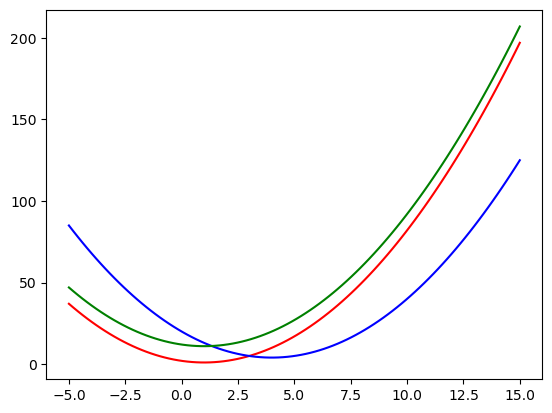

In [5]:
## Ici on trace J(1,2,1,x) avec x entre -5 et 15 juste pour voir ces variations par rapport à une variable (la dernière)
#plt.style.use('seaborn')

x = np.linspace(-5,15,100)
v =np.array([1,2,1])

y1 = [J1(np.append (v,xi))[0] for xi in x]
y2 = [J2(np.append (v,xi))[0] for xi in x]
yR = [JR(np.append (v,xi))[0] for xi in x]

plt.plot(x,y1,color="red")
plt.plot(x,y2,color="blue")
plt.plot(x,yR,color="green")
plt.show()

## Etape 1.
> Rappeler les trois versions GF, GV et GO, et identifier l’ensemble des données utilisateur, numériques, et de contrôle.

- Pour GF : $u_{k+1}=u_k-\rho \nabla J(u_k)$
- Pour GV : 
- Pour GO : $u_{k+1}=u_k-\rho \nabla _k J(u_k)$ where $J(u_k-\rho _k \nabla J(u_k))=inf_{\rho >0} J(u_k-\rho \nabla J(u_k)$

## Etape 2.
- Ecrire le programme GF (utiliser les modules déjà définis de calcul de la fonction coût et de son gradient pour les fonctions $J_1$, $J_2$, $J_R$).
- Effectuer les tests de validation de GF pour les fonctions $J_1$ et $J_2$ ($N = 10,20,40$) : On prendra un pas fixe $t = 1$, qu’observe t-on et pourquoi ? puis prendre $t=0.1$ et ensuite $t = 0.5$.

**Pseudocode**

>  
- Initiaisation: $u_0 \in {\mathbb R}^n$ arbitraire et pas $t>0$
- Itérations: répéter pour $k=0,1,\dots$   
  - calculer le gradient $\nabla f (u_{k})$;
  - calculer $u_{k+1} = u_{k} - t \nabla f (u_{k})$;
- Critère d'arrêt:  $\|\nabla f (u_{k}) \|_2 \leq \epsilon$ $\big($on utilise ici la norme euclidienne $\|\cdot \|_2$ $\big)$


In [44]:
# Modifier ici le choix de fonction, J1, J2, JR
def cost(v):
  return J1(v)

In [61]:
N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
eps = 1.e-7; # tolerance sur la norme du gradient
Kmax = 1500 ; # nombre max d'iterations


# les pas t dans une liste pour print tous les cas
t_val = [0.1,0.5,1]
for t in t_val:
    u = np.zeros(N)
    for k in range(0,Kmax):
        grad = cost(u)[1]
        u = u - t * grad
        norme = np.linalg.norm(grad)
        if norme < eps : 
            break
            
    # Affichage pour chaque t le nombre d'itération et le vecteur trouvé...
    print(f"> t={t} k={k} u={u}")

> t=0.1 k=81 u=[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999]
> t=0.5 k=1 u=[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
> t=1 k=1499 u=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Etape 3.
> Dans cette étape on va construire l’approximation parabolique de la fonction $f(t) = J(u_k − t\nabla J(u_k))$, qui utilise $f(0)$, $f′(0)$ et $f(t_{k−1})$. S’en servir pour implémenter une approximation du calcul du pas optimal $t_k$. Valider GO sur les cas $J_1$ et $J_2$. Comparer ensuite GF et GO sur $J_R$ (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations).

Etant donné $u_k$, la valeur $J(u_k)$ et le gradient $\nabla J(u_k)$, on propose d'approcher $J$ par un modèle quadratique au voisinage de $u_k$ le long du gradient $G_k:= \nabla J (u_k)$, soit

$$
f(t):= J(u_k- t G_k ) \simeq J(u_k) - t G_k^\top G_k + \gamma_k t^2 =: \tilde{f}(t),
$$
avec $\gamma_k$  un scalaire qu'il faut identifier . On a en particulier,

$$
f(0)=J(u_k),
\quad\quad f'(0)= - G_k^\top G_k.
$$

- En prenant $\tilde{f}(t_{k-1}) = f(t_{k-1})$, **identifier** l'expression de $\gamma_k$ en fonction de $t_{k-1}, f(t_{k-1}), J(u_k)$ et $\nabla J (u_k)$.  
- **En déduire** l'approximation $t_{k}:=\mathop{\mathrm{argmin}}\limits_{t>0}\tilde{f}(t)$ du pas optimal en fonction de $\gamma_k$ et $\nabla J(u_k)$.
- **Implémenter** l'expression du pas optimal approché pour $J_1$, $J_2$ et $J_R$ dans la fonction suivante (où $u$ joue le rôle de $u_{k}$ et $t$ joue le rôle de $t_{k-1}$):


In [72]:
def PasOptJ1(u, t):
    grad = J1(u)[1]
    f0 = J1(u)[0]
    ft = J1(u - t * grad)[0]
    
    num = ft - f0 + t * np.dot(grad, grad)
    den = t*t
    
    if den == 0 or np.isnan(den): 
        return t
    
    gamma_k = num / den
    
    if gamma_k == 0 or np.isnan(gamma_k): 
        return t
    
    tk = -np.dot(grad, grad) / (2 * gamma_k) if gamma_k != 0 else t
    if tk > 0:
        return tk 
    else :
        return t


def PasOptJ2(u, t):
    grad = J2(u)[1]
    f0 = J2(u)[0]
    ft = J2(u - t * grad)[0]
    
    num = ft - f0 + t * np.dot(grad, grad)
    den = t*t
    
    if den == 0 or np.isnan(den): 
        return t
    
    gamma_k = num / den
    
    if gamma_k == 0 or np.isnan(gamma_k): 
        return t
    
    tk = -np.dot(grad, grad) / (2 * gamma_k) if gamma_k != 0 else t
    if tk > 0:
        return tk 
    else :
        return t


def PasOptJR(u, t):
    grad = JR(u)[1]
    f0 = JR(u)[0]
    ft = JR(u - t * grad)[0]
    
    num = ft - f0 + t * np.dot(grad, grad)
    den = t*t
    
    if den == 0 or np.isnan(den): 
        return t
    
    gamma_k = num / den
    
    if gamma_k == 0 or np.isnan(gamma_k): 
        return t
    
    tk = -np.dot(grad, grad) / (2 * gamma_k) if gamma_k != 0 else t
    if tk > 0:
        return tk 
    else :
        return t



**Pseudocode du GO (approché)**

>  
- Initialisation: prende un vecteur $u_0 \in {\mathbb R}^n$ arbitraire et un scalaire arbitraire $t_{-1}>0$
- Itérations: Répéter pour $k=0, 1,\dots$
  - Calculer le pas optimal approché $t_k$;
  - Calculer $u_{k+1} = u_{k} - t_{k} \nabla J (u_{k})$;
- Critère d'arrêt:  $\|\nabla J (u_{k}) \|_2 \leq \epsilon$


Valider cet algorithme GO sur les cas $J_1$ et $J_2$.

In [73]:
def GO(J,pasOpt):
    N=10 ; #nombre de variables d'optimisation (ou dimension du probleme)
    eps = 1.e-7; # tolerance sur la norme du gradient
    Kmax = 1500 ; # nombre max d'iterations
    tk = 0.1
    u = np.zeros(N)
    for k in range(0,Kmax):
        grad = J(u)[1]
        tk = pasOpt(u,tk)
        u = u - tk * grad
        norme = np.linalg.norm(grad)
        if norme < eps : 
            break
            
    print(f"> t={t} k={k} u={u}")
GO(J2,PasOptJ2)
    

TypeError: can't multiply sequence by non-int of type 'float'

Comparer ensuite GF et GO sur  $J_R$  (tracer, sur le même graphique, les 2 courbes de convergence des coûts en fonction des itérations)

In [ ]:
## à compléter

## Etape 5.
> Etudier les méthodes GF et GO sur le cas de la fonction $J_H (x, y) = (x^2 +y−2)^2 +(y^2 −2x+1)^2$ . On prendra comme guess initial $u_0 = (0, 0)$ puis $u_0 = (1.5, −1.5)$. Que constatez-vous ? Comment valider ce constat ?

In [ ]:
## à compléter